In [1]:
# Imports and Notebook setup
from timeit import timeit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rrmpg.models import HBVEdu
from rrmpg.data import CAMELSLoader
from rrmpg.tools.monte_carlo import monte_carlo
from rrmpg.utils.metrics import calc_nse
from sklearn.metrics import balanced_accuracy_score


In [2]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import pickle
import shap
import itertools

from scipy.optimize import minimize



## Load data

In [3]:
df = CAMELSLoader().load_basin('01031500')

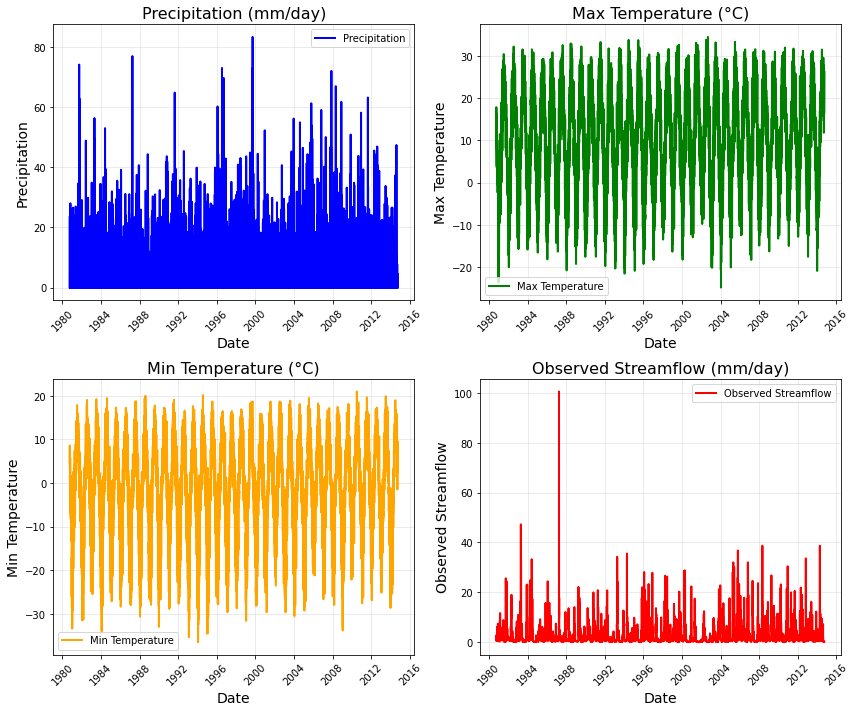

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df.rename(columns={
    'prcp(mm/day)': 'Precipitation',
    'tmax(C)': 'Max Temperature',
    'tmin(C)': 'Min Temperature',
    'QObs(mm/d)': 'Observed Streamflow'
}, inplace=True)

# Filter for the last 2 years
#last_two_years = df.index.max() - pd.DateOffset(years=12)
#df_filtered = df[df.index >= last_two_years]
df_filtered= df

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
variables = ['Precipitation', 'Max Temperature', 'Min Temperature', 'Observed Streamflow']
titles = [
    'Precipitation (mm/day)',
    'Max Temperature (°C)',
    'Min Temperature (°C)',
    'Observed Streamflow (mm/day)'
]
colors = ['blue', 'green', 'orange', 'red']

for ax, var, title, color in zip(axes.flatten(), variables, titles, colors):
    ax.plot(df_filtered.index, df_filtered[var], label=var, color=color, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel(var, fontsize=14)
    ax.grid(alpha=0.3)
    ax.tick_params(axis='x', labelrotation=45)
    ax.legend(fontsize=10)

plt.tight_layout()  
plt.savefig('img/tamporal_trends_camels.png', dpi=300)  

plt.show()


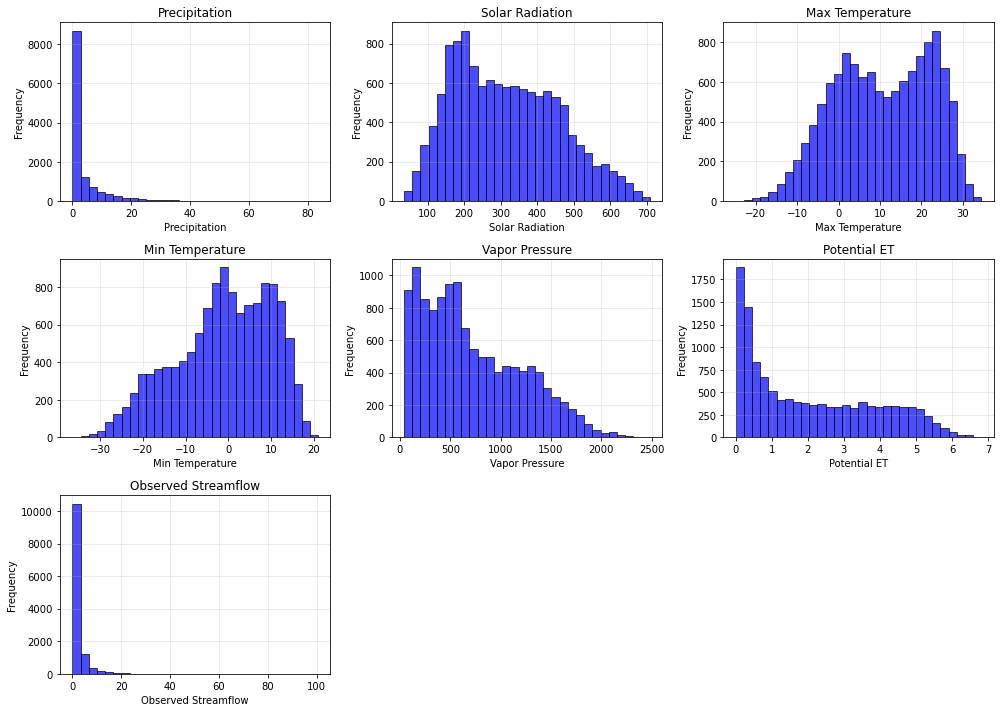

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df.rename(columns={
    'prcp(mm/day)': 'Precipitation',
    'srad(W/m2)': 'Solar Radiation',
    'tmax(C)': 'Max Temperature',
    'tmin(C)': 'Min Temperature',
    'vp(Pa)': 'Vapor Pressure',
    'PET': 'Potential ET',
    'QObs(mm/d)': 'Observed Streamflow'
}, inplace=True)

attributes = ['Precipitation', 'Solar Radiation', 'Max Temperature', 'Min Temperature', 'Vapor Pressure', 'Potential ET', 'Observed Streamflow']

# histograms
plt.figure(figsize=(14, 10))
for i, attr in enumerate(attributes):
    plt.subplot(3, 3, i + 1) 
    plt.hist(df[attr], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(attr, fontsize=12)
    plt.xlabel(attr, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('img/Frequency_Distribution_of_Numerical_Attributes.jpeg',dpi=300)
plt.show()


<Figure size 720x432 with 0 Axes>

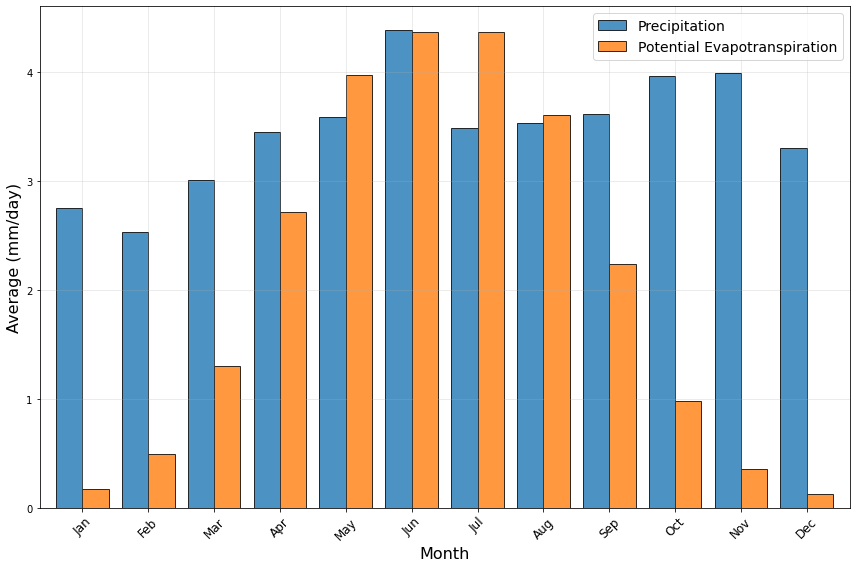

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df.rename(columns={
    'prcp(mm/day)': 'Precipitation',
    'Potential ET': 'Potential Evapotranspiration'
}, inplace=True)
# Aggregate data by month
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')[['Precipitation', 'Potential Evapotranspiration']].mean()

# bar charts
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', figsize=(12, 8), width=0.8, alpha=0.8, edgecolor='black')

plt.xlabel('Month', fontsize=16)
plt.ylabel('Average (mm/day)', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('img/precipitation_pte.png', dpi=300)  
plt.show()
